##### Задание 1
На основании датасета для каждого покупателя получите:
- предпочитаемый метод оплаты; 
- общие траты;
- количество денег, потраченных на дополнительные услуги и аксессуары. 

In [213]:
# Чтение датасета

import pandas as pd

# Загрузка данных
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

# Просмотр структуры данных
print("Первые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())


Первые 5 строк:
   Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Access

In [214]:
total_customers = df['Customer ID'].nunique()
total_preferred_payment_method = df['Payment Method'].nunique()
total_order_status = df['Order Status'].nunique()

payment_methods = df['Payment Method'].unique()
order_statuses = df['Order Status'].unique()

print(f"Общее количество покупателей: {total_customers}")
print(f"Общее количество способов оплаты: {total_preferred_payment_method}")
print(f"Методы оплаты: {payment_methods}")
print(f"Общее количество статусов оплаты: {total_order_status}")
print(f"Статусы оплаты: {order_statuses}")

Общее количество покупателей: 12136
Общее количество способов оплаты: 6
Методы оплаты: ['Credit Card' 'Paypal' 'Cash' 'Debit Card' 'Bank Transfer' 'PayPal']
Общее количество статусов оплаты: 2
Статусы оплаты: ['Cancelled' 'Completed']


In [215]:
# Предпочитаемый метод оплаты
completed_orders = df[df['Order Status'] == 'Completed']

preferred_payment = completed_orders.groupby('Customer ID')['Payment Method'].agg(
   lambda x: x.mode().iloc[0] if not x.mode().empty else 'No completed orders' 
).reset_index()

print('Предпочитаемый метод оплаты\n')
print(preferred_payment)

Предпочитаемый метод оплаты

      Customer ID Payment Method
0            1000         Paypal
1            1002           Cash
2            1003           Cash
3            1004    Credit Card
4            1005     Debit Card
...           ...            ...
9461        19990         PayPal
9462        19991    Credit Card
9463        19995    Credit Card
9464        19996  Bank Transfer
9465        19998  Bank Transfer

[9466 rows x 2 columns]


In [216]:
# Общие траты
total_spending = completed_orders.groupby('Customer ID')['Total Price'].sum().reset_index()
total_spending.columns = ['Customer ID', 'Total Spending']

print('Общие траты\n')
print(total_spending)

Общие траты

      Customer ID  Total Spending
0            1000          741.09
1            1002         5020.60
2            1003           41.50
3            1004           83.00
4            1005        11779.11
...           ...             ...
9461        19990         9117.44
9462        19991        12368.06
9463        19995         5394.56
9464        19996        12063.02
9465        19998          674.32

[9466 rows x 2 columns]


In [217]:
# Деньги, потраченные на дополнительные услуги и аксессуары
addons_spending = completed_orders.groupby('Customer ID')['Add-on Total'].sum().reset_index()
addons_spending.columns = ['Customer ID', 'Add-ons Spending']

print('Деньги, потраченные на дополнительные услуги и аксессуары\n')
print(addons_spending)

Деньги, потраченные на дополнительные услуги и аксессуары

      Customer ID  Add-ons Spending
0            1000             26.09
1            1002             60.16
2            1003             35.56
3            1004             65.78
4            1005             75.33
...           ...               ...
9461        19990            113.56
9462        19991              0.00
9463        19995              0.00
9464        19996            198.98
9465        19998              0.00

[9466 rows x 2 columns]


In [218]:
# Объединенные данные 
customer_analysis = preferred_payment.merge(
    total_spending, on = 'Customer ID', how = 'left'
).merge(
    addons_spending, on = 'Customer ID', how = 'left' 
)

print('Объединенные данные\n')
print(customer_analysis)

Объединенные данные

      Customer ID Payment Method  Total Spending  Add-ons Spending
0            1000         Paypal          741.09             26.09
1            1002           Cash         5020.60             60.16
2            1003           Cash           41.50             35.56
3            1004    Credit Card           83.00             65.78
4            1005     Debit Card        11779.11             75.33
...           ...            ...             ...               ...
9461        19990         PayPal         9117.44            113.56
9462        19991    Credit Card        12368.06              0.00
9463        19995    Credit Card         5394.56              0.00
9464        19996  Bank Transfer        12063.02            198.98
9465        19998  Bank Transfer          674.32              0.00

[9466 rows x 4 columns]


##### Задание 2
1. На основании датасета получите доход:
- по каждому методу доставки, 
- по каждому типу продукта, 
- по дополнительным услугам за каждый месяц,
- по дополнительным услугам за каждый квартал. 
2. Отобразите полученные данные на графике.


In [219]:
total_shipping_type = df['Shipping Type'].nunique()
shipping_types = df['Shipping Type'].unique()
total_product_type = df['Product Type'].nunique()
product_types = df['Product Type'].unique()

print(f"Общее количество способов доставки: {total_shipping_type}")
print(f"Способы доставки: {shipping_types}")
print(f"Общее количество типов продуктов: {total_product_type}")
print(f"Типы продуктов: {product_types}")

Общее количество способов доставки: 5
Способы доставки: ['Standard' 'Overnight' 'Express' 'Same Day' 'Expedited']
Общее количество типов продуктов: 5
Типы продуктов: ['Smartphone' 'Tablet' 'Laptop' 'Smartwatch' 'Headphones']


In [220]:
# Доход по методам доставки
shipping_revenue = completed_orders.groupby('Shipping Type')['Total Price'].sum().reset_index()
shipping_revenue.columns = ['Shipping Type', 'Total Revenue']


print("Доход по методам доставки\n")
print(shipping_revenue)

Доход по методам доставки

  Shipping Type  Total Revenue
0     Expedited     8430385.58
1       Express     5632093.35
2     Overnight     5887722.52
3      Same Day     8292376.50
4      Standard    14387037.62


1. Доход по методам доставки:


Text(0.5, 0, 'Метод доставки')

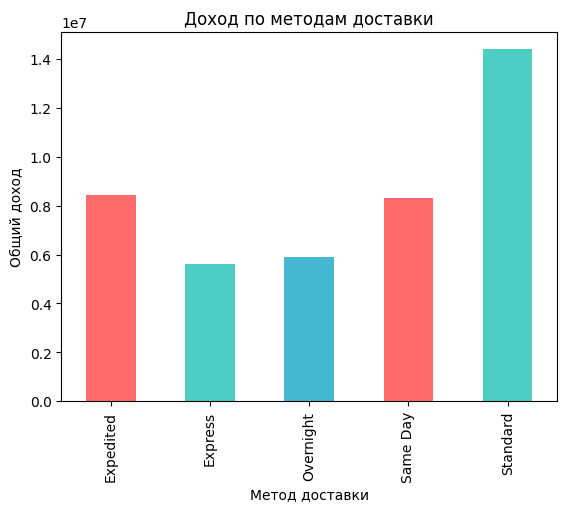

In [221]:
# График дохода по методам доставки
print("1. Доход по методам доставки:")
shipping_plot = shipping_revenue.plot(
    kind='bar',
    x='Shipping Type',
    y='Total Revenue',
    title='Доход по методам доставки',
    color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
    legend=False
)
shipping_plot.set_ylabel('Общий доход')
shipping_plot.set_xlabel('Метод доставки')

In [222]:
# Доход по типам продуктов
product_revenue = completed_orders.groupby('Product Type')['Total Price'].sum().reset_index()
product_revenue.columns = ['Product Type', 'Total Revenue']

print("Доход по типам продуктов:\n")
print(product_revenue)

Доход по типам продуктов:

  Product Type  Total Revenue
0   Headphones     2734651.00
1       Laptop     8365905.25
2   Smartphone    14407835.84
3   Smartwatch     9398591.23
4       Tablet     7722632.25


1. Доход по типам продуктов:


Text(0.5, 0, 'Тип продукта')

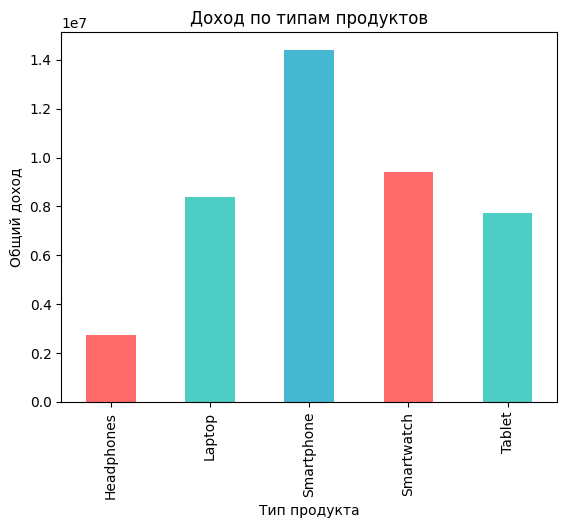

In [223]:
# График дохода по типам продуктов
print("1. Доход по типам продуктов:")
product_plot = product_revenue.plot(
    kind='bar',
    x='Product Type',
    y='Total Revenue',
    title='Доход по типам продуктов',
    color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
    legend=False
)
product_plot.set_ylabel('Общий доход')
product_plot.set_xlabel('Тип продукта')

In [224]:
# Добавляем периоды для анализа в completed_orders

completed_orders = completed_orders.copy()
# Преобразуем столбец даты в datetime
completed_orders['Purchase Date'] = pd.to_datetime(completed_orders['Purchase Date'])

# Добавляем столбцы
completed_orders['Year-Month'] = completed_orders['Purchase Date'].dt.to_period('M')
completed_orders['Year-Quarter'] = completed_orders['Purchase Date'].dt.to_period('Q')

print("Первые 5 строк завершенных заказов:")
print(completed_orders.head())

print(f"\nВсего завершенных заказов: {len(completed_orders)}")

Первые 5 строк завершенных заказов:
   Customer ID  Age  Gender Loyalty Member Product Type      SKU  Rating  \
1         1000   53    Male             No       Tablet  SKU1002       3   
2         1002   41    Male             No       Laptop  SKU1005       3   
3         1002   41    Male            Yes   Smartphone  SKU1004       2   
4         1003   75    Male            Yes   Smartphone  SKU1001       5   
5         1004   41  Female             No   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   
5    Completed    Credit Card        83.00       20.75         4   

  Purchase Date Shipping Type          Add-ons Purchased  Add-on Total  \
1    2024-04-20     Over

In [225]:
# Доход от дополнительных услуг по месяцам
monthly_addons = completed_orders.groupby('Year-Month')['Add-on Total'].sum().reset_index()
monthly_addons.columns = ['Month', 'Add-ons Revenue']

print("Доход от дополнительных услуг по месяцам:\n")
print(monthly_addons)

Доход от дополнительных услуг по месяцам:

      Month  Add-ons Revenue
0   2023-09          5337.61
1   2023-10         26153.21
2   2023-11         24453.33
3   2023-12         22750.23
4   2024-01         93254.95
5   2024-02         80253.72
6   2024-03         84713.93
7   2024-04         82294.06
8   2024-05         89374.18
9   2024-06         84648.60
10  2024-07         88811.55
11  2024-08         87861.11
12  2024-09         65688.76


Доход  от дополнительных услуг по месяцам:


Text(0.5, 0, 'Месяц')

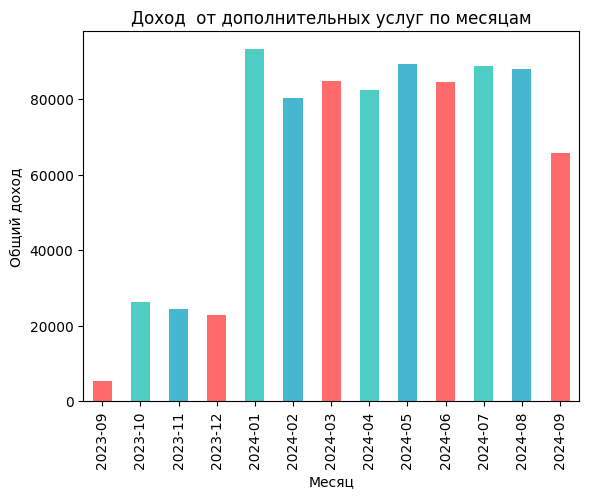

In [226]:
# График дохода от дополнительных услуг по месяцам
print("Доход  от дополнительных услуг по месяцам:")
monthly_plot = monthly_addons.plot(
    kind='bar',
    x='Month',
    y='Add-ons Revenue',
    title='Доход  от дополнительных услуг по месяцам',
    color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
    legend=False
)
monthly_plot.set_ylabel('Общий доход')
monthly_plot.set_xlabel('Месяц')


In [227]:
# Доход от дополнительных услуг по кварталам

quarterly_addons = completed_orders.groupby('Year-Quarter')['Add-on Total'].sum().reset_index()
quarterly_addons.columns = ['Quarter', 'Add-ons Revenue']

print("Доход от дополнительных услуг по кварталам:\n")
print(quarterly_addons)

Доход от дополнительных услуг по кварталам:

  Quarter  Add-ons Revenue
0  2023Q3          5337.61
1  2023Q4         73356.77
2  2024Q1        258222.60
3  2024Q2        256316.84
4  2024Q3        242361.42


1. Доход  от дополнительных услуг по кварталам:


Text(0.5, 0, 'Квартал')

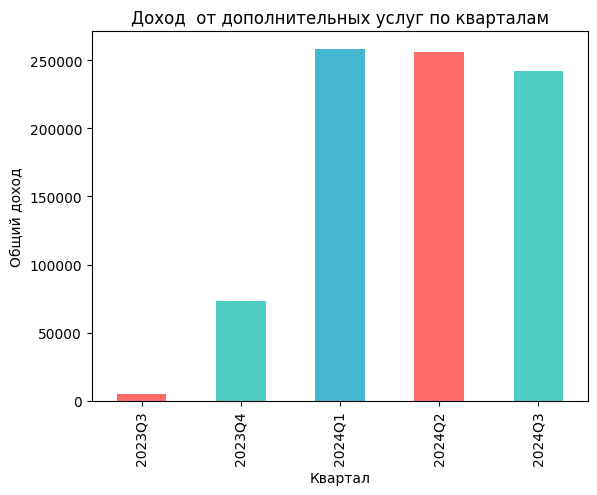

In [228]:
# График дохода от дополнительных услуг по кварталам
print("1. Доход  от дополнительных услуг по кварталам:")
quarter_plot = quarterly_addons.plot(
    kind='bar',
    x='Quarter',
    y='Add-ons Revenue',
    title='Доход  от дополнительных услуг по кварталам',
    color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
    legend=False
)
quarter_plot.set_ylabel('Общий доход')
quarter_plot.set_xlabel('Квартал')